In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/capstor/users/cscs/xyixuan/PDM/')

In [3]:
from src.verbatim_eval.rouge_ttr import eval_rouge_ttr, batch_rouge_ttr_calc
from src.verbatim_eval.rouge_ttr import log_metric, log_metrics
from src.verbatim_eval.utils import load_inference_data
import numpy as np
from src.verbatim_eval.controlled_expr import EvalConfig, eval_expr

/users/xyixuan/miniconda3/envs/lighteval/lib/python3.12/site-packages/ignite/handlers/checkpoint.py:16: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import ZeroRedundancyOptimizer
/users/xyixuan/miniconda3/envs/lighteval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [34]:
base_path = "/iopsstor/scratch/cscs/xyixuan/Megatron-LM/logs/Meg-Runs/Goldfish"
expr = "llama3-3b-15n-8192sl-60gbsz-standard" 
repetitions  = np.array([1, 2, 4, 8, 16, 24, 32, 48, 64, 96, 128])

eval_config = EvalConfig(
    base_path=base_path,
    expr=expr,
    repetitions=np.array([1, 2, 4, 8, 16, 24, 32, 48, 64, 96, 128]),
    policy="greedy",
    offsets=[0, 50, 100],
    prefix_lengths=[50, 100, 250, 750, 1000, 1500, 2000, 3000, 4000, 5000],
    suffix_lengths=[500]
)

result = eval_expr(eval_config)

Processing repetitions:   0%|          | 0/11 [00:00<?, ?it/s]





Generating train split: 500 examples [00:00, 15096.76 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 589.01 examples/s]










Generating train split: 500 examples [00:00, 16315.93 examples/s]


















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 577.69 examples/s] 










Generating train split: 500 examples [00:00, 15484.45 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 593.93 examples/s]










Generating train split: 500 examples [00:00, 12251.72 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 580.32 examples/s]










Generating train split: 500 examples [00:00, 12459.24 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 563.80 examples/s]










Generating train split: 500 examples [00:00, 11829.47 examples/s]















Ma

In [35]:
result.save()

In [37]:
base_path = "/iopsstor/scratch/cscs/xyixuan/Megatron-LM/logs/Meg-Runs/Goldfish"
expr = "llama3-3b-15n-8192sl-60gbsz-goldfish"
repetitions  = np.array([1, 2, 4, 8, 16, 24, 32, 48, 64, 96, 128])

eval_config = EvalConfig(
    base_path=base_path,
    expr=expr,
    repetitions=np.array([1, 2, 4, 8, 16, 24, 32, 48, 64, 96, 128]),
    policy="greedy",
    offsets=[0, 50, 100],
    prefix_lengths=[50, 100, 250, 750, 1000, 1500, 2000, 3000, 4000, 5000],
    suffix_lengths=[500]
)

result = eval_expr(eval_config)

Processing repetitions:   0%|          | 0/11 [00:00<?, ?it/s]





Generating train split: 500 examples [00:00, 13840.76 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 579.09 examples/s]










Generating train split: 500 examples [00:00, 13880.06 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 591.85 examples/s]










Generating train split: 500 examples [00:00, 15181.90 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 598.89 examples/s]










Generating train split: 500 examples [00:00, 12384.78 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 581.40 examples/s]










Generating train split: 500 examples [00:00, 11797.39 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 586.71 examples/s]










Generating train split: 500 examples [00:00, 11839.82 examples/s]















Map (n

In [38]:
result.save()

In [5]:
from ignite.metrics import RougeL
from typing import List
import numpy as np
from tqdm import tqdm

In [7]:
eval_config = EvalConfig(
    base_path=base_path,
    expr=expr,
    repetitions=np.array([1, 2, 4, 8, 16, 24, 32, 48, 64, 96, 128]),
    policy="greedy",
    offsets=[0, 50, 100],
    prefix_lengths=[50, 100, 250, 750, 1000, 1500, 2000, 3000, 4000, 5000],
    suffix_lengths=[500]
)

result = eval_expr(eval_config)

Processing repetitions:   0%|          | 0/11 [00:00<?, ?it/s]





Generating train split: 500 examples [00:00, 14594.47 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 600.15 examples/s]










Generating train split: 500 examples [00:00, 15301.54 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 599.96 examples/s]










Generating train split: 500 examples [00:00, 14093.57 examples/s]


















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 584.18 examples/s]










Generating train split: 500 examples [00:00, 14335.38 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 604.33 examples/s]










Generating train split: 500 examples [00:00, 12521.58 examples/s]















Map (num_proc=100): 100%|██████████| 500/500 [00:00<00:00, 598.24 examples/s]










Generating train split: 500 examples [00:00, 11101.62 examples/s]















Map

In [8]:
result.save()

In [8]:
from src.vis.heatmaps import create_heatmaps_subplots
from src.verbatim_eval.controlled_expr import get_repetition_mean_df, print_repetition_stats, Results

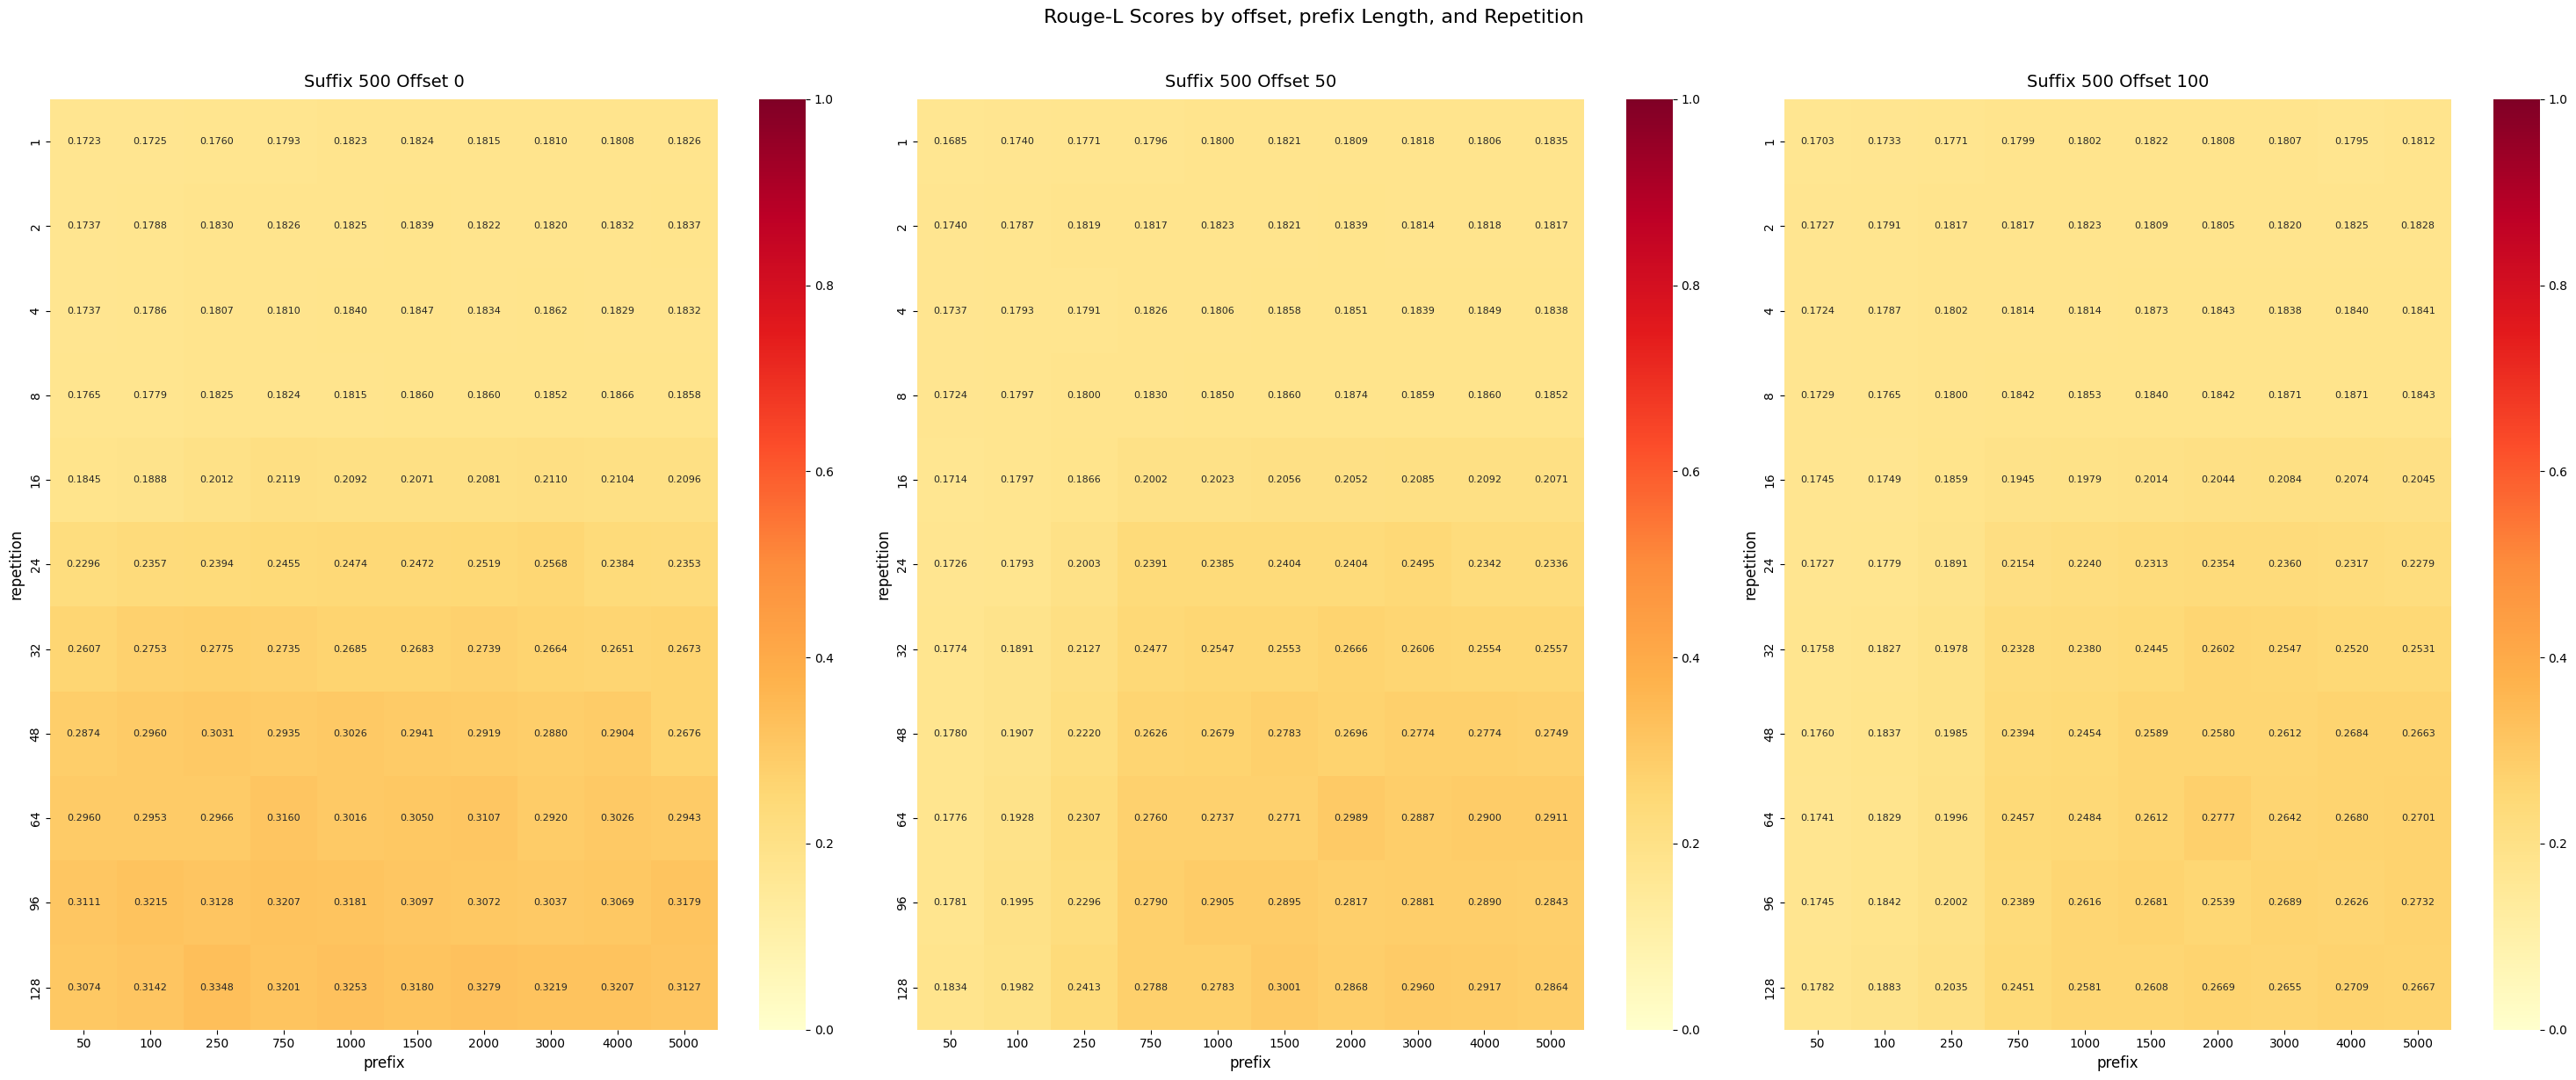

In [39]:
offsets = [0, 50, 100]

heatmap_data = {
    f'Suffix 500 Offset {offset}': get_repetition_mean_df(
        results=result,
        metric='Rouge-L',
        suffix=500,
        offset=offset
    ) for offset in offsets
}

create_heatmaps_subplots(heatmap_data)

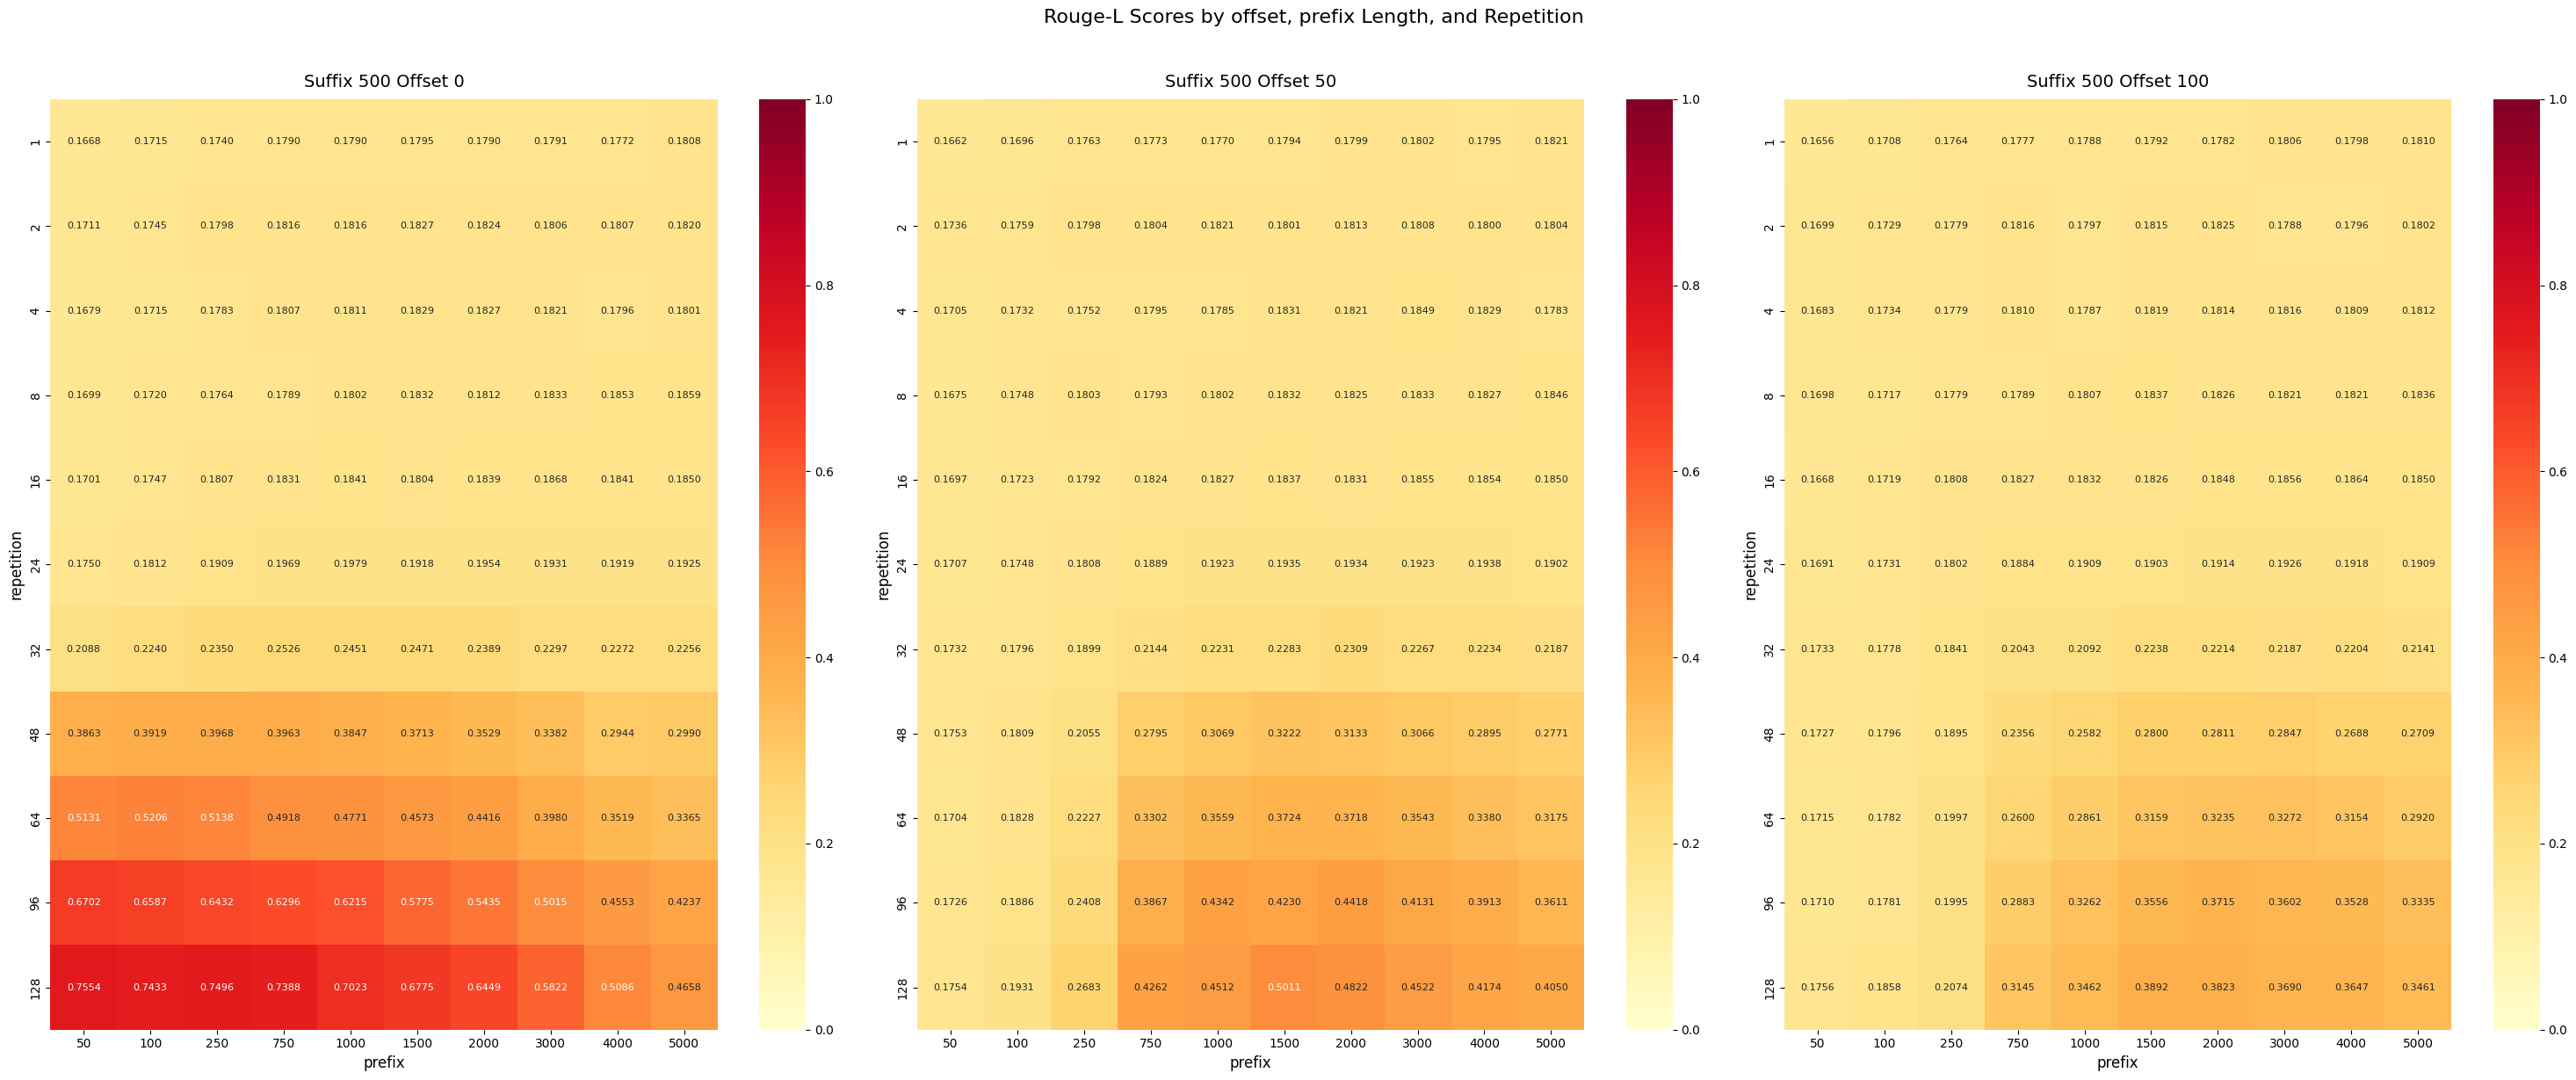

In [11]:
offsets = [0, 50, 100]

heatmap_data_bos = {
    f'Suffix 500 Offset {offset}': get_repetition_mean_df(
        results=Results.load('/capstor/users/cscs/xyixuan/PDM/results/sparse/llama3-1b-15n-8192sl-60gbsz-standard-bod-hiding-xboc/offset_0_50_100_prefix_50_100_250_750_1000_1500_2000_3000_4000_5000_suffix_500.pkl'),
        metric='Rouge-L',
        suffix=500,
        offset=offset
    ) for offset in offsets
}

create_heatmaps_subplots(heatmap_data_bos)

In [14]:
from src.vis.heatmaps import create_heatmaps_subplots, create_heatmaps_difference_subplots


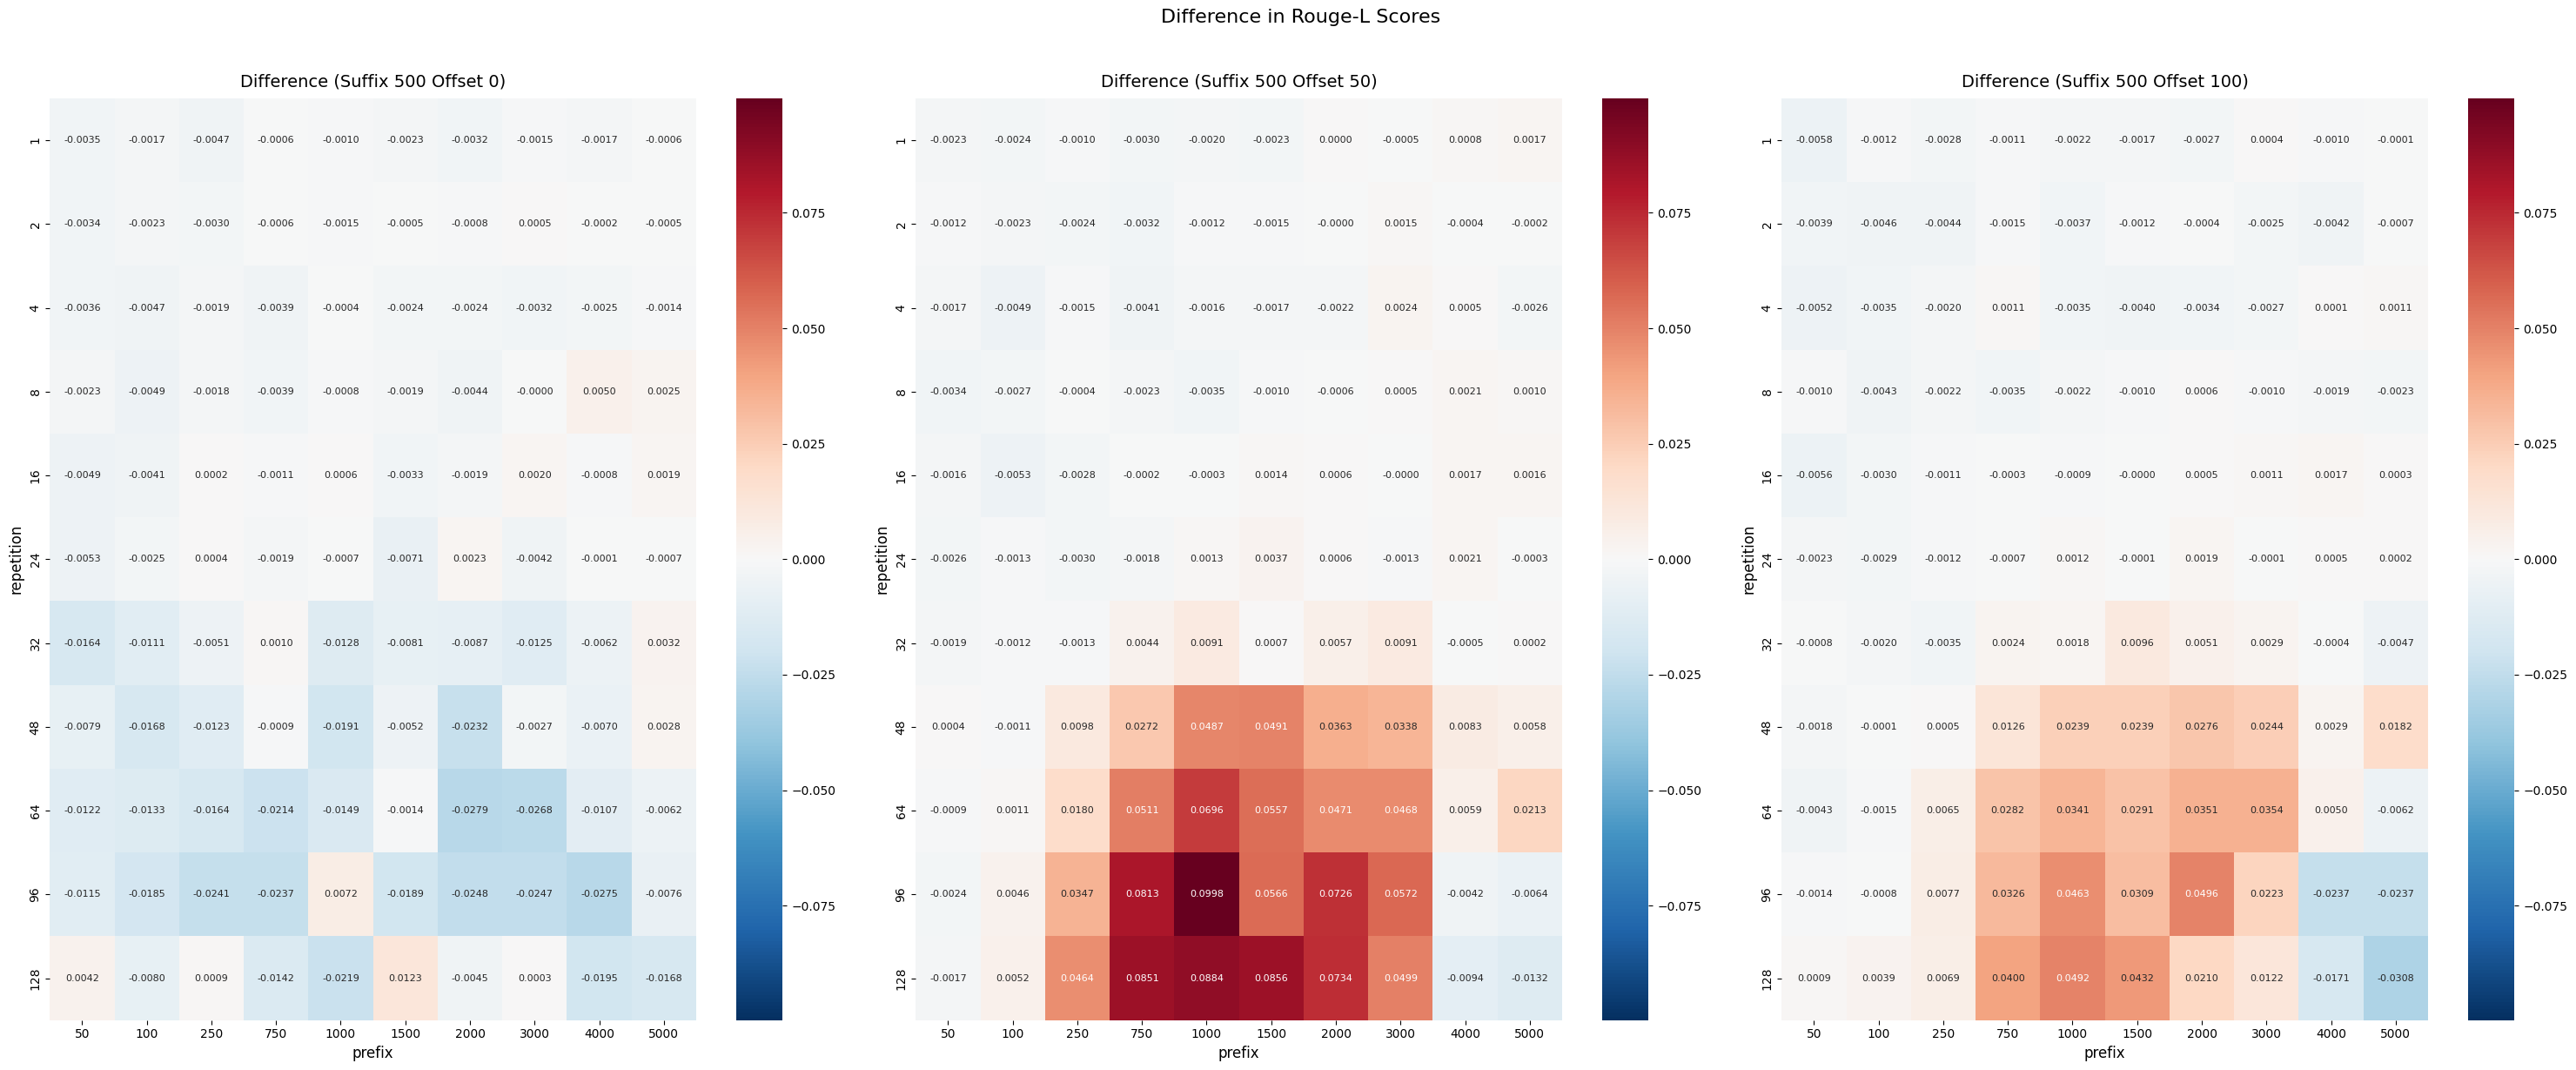

In [15]:
create_heatmaps_difference_subplots(heatmap_data_bos, heatmap_data)

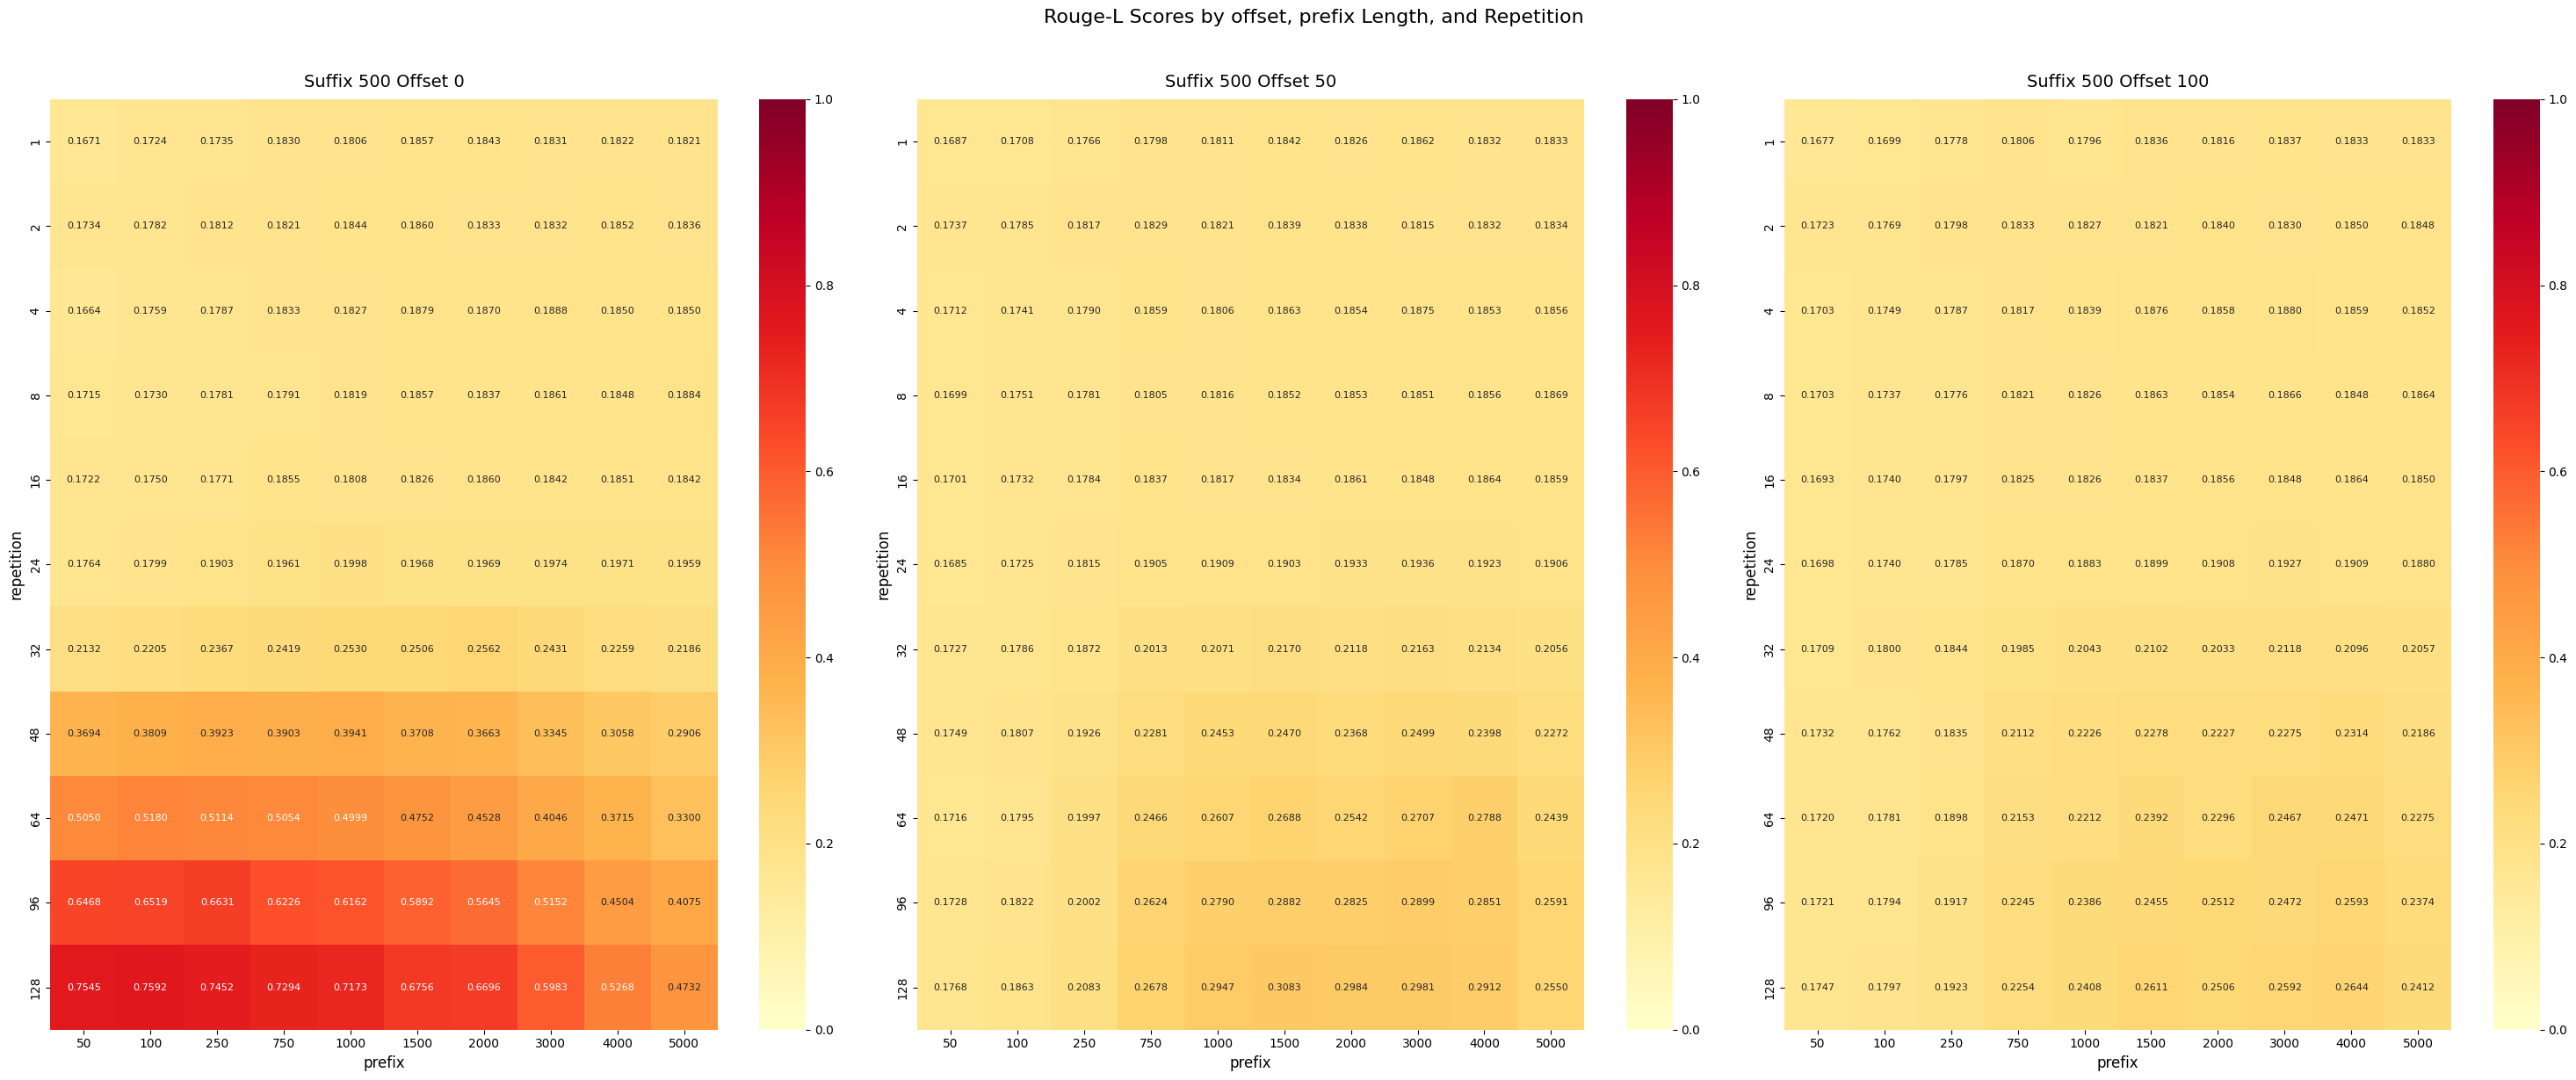

In [19]:
heatmap_data_bod_no_xdoc = {
    f'Suffix 500 Offset {offset}': get_repetition_mean_df(
        results=Results.load('/capstor/users/cscs/xyixuan/PDM/results/sparse/llama3-1b-15n-8192sl-60gbsz-standard-no-bos/offset_0_50_100_prefix_50_100_250_750_1000_1500_2000_3000_4000_5000_suffix_500.pkl'),
        metric='Rouge-L',
        suffix=500,
        offset=offset
    ) for offset in offsets
}

create_heatmaps_subplots(heatmap_data_bod_no_xdoc)

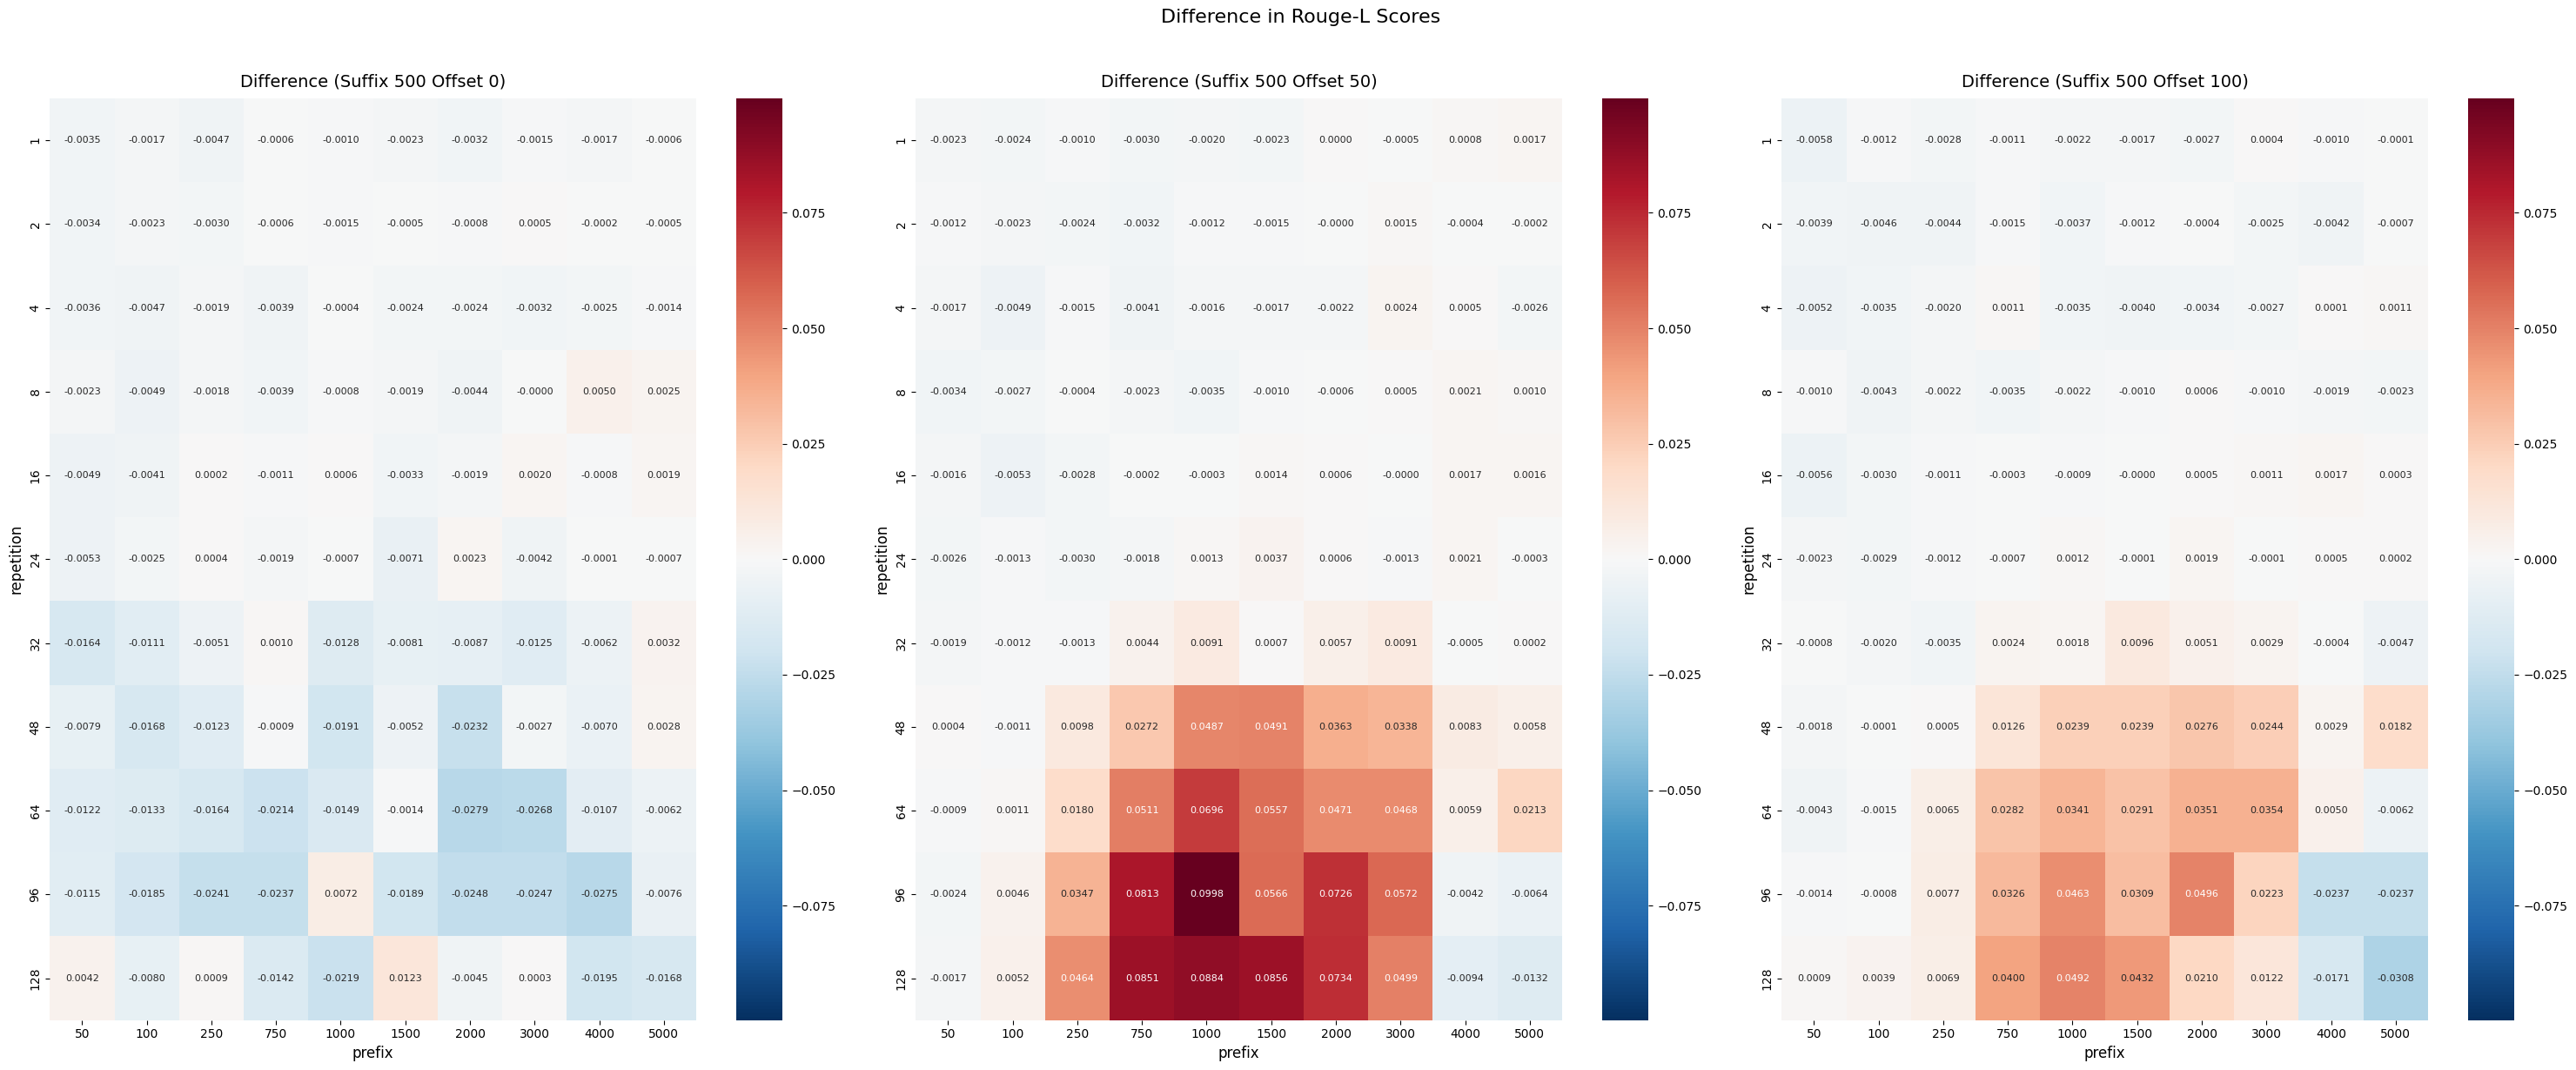

In [23]:
create_heatmaps_difference_subplots(heatmap_data_bos, heatmap_data)

In [ ]:
offsets = [0, 50, 100]

heatmap_data = {
    f'Suffix 500 Offset {offset}': get_repetition_mean_df(
        results=Results.load('/capstor/users/cscs/xyixuan/PDM/results/sparse/llama3-1b-15n-8192sl-60gbsz-standard/offset_0_50_100_prefix_50_100_250_750_1000_1500_2000_3000_4000_5000_suffix_500.pkl'),
        metric='Rouge-L',
        suffix=500,
        offset=offset
    ) for offset in offsets
}

create_heatmaps_subplots(heatmap_data)

In [15]:
get_repetition_mean_df(
        results=Results.load('/capstor/users/cscs/xyixuan/PDM/results/sparse/llama_1.5B_Sparse_Gutenberg_K_50_H_50_GBS_60_SEQ_10200350/offset_0_50_100_prefix_50_100_250_750_1000_1500_2000_3000_4000_5000_suffix_500.pkl'),
        metric='Rouge-L',
        suffix=500,
        offset=50
) - get_repetition_mean_df(
        results=result,
        metric='Rouge-L',
        suffix=500,
        offset=50
)

prefix,50,100,250,750,1000,1500,2000,3000,4000,5000
repetition,,,,,,,,,,
1,-0.002804,-0.005476,-0.004956,-0.001164,-0.001400,-0.004388,-0.005000,-0.003880,-0.005444,0.001292
2,-0.005124,-0.005568,-0.000484,-0.004068,-0.003216,-0.001744,-0.005120,-0.002740,-0.001420,-0.001616
4,-0.004472,-0.005524,-0.002944,-0.002012,-0.003780,-0.002484,-0.004156,-0.003600,-0.002236,-0.000512
8,-0.003308,-0.005124,-0.003216,-0.004056,-0.003688,-0.000912,-0.003312,-0.004268,-0.003868,-0.003748
16,-0.004200,-0.000836,-0.001512,-0.001016,0.000296,0.000268,0.000508,0.000348,0.002796,-0.000312
24,-0.004172,-0.001256,-0.001492,0.003356,0.000696,0.003368,-0.000908,-0.001396,0.003140,0.004680
32,-0.003164,-0.000152,0.001084,0.005792,0.004708,0.009820,0.013896,0.011028,0.008328,0.015492
48,-0.003936,-0.000604,0.005260,0.020464,0.023136,0.033212,0.026876,0.027400,0.026532,0.044320
64,0.000496,0.001144,0.008804,0.011924,0.023408,0.023260,0.037140,0.024732,0.031208,0.035740


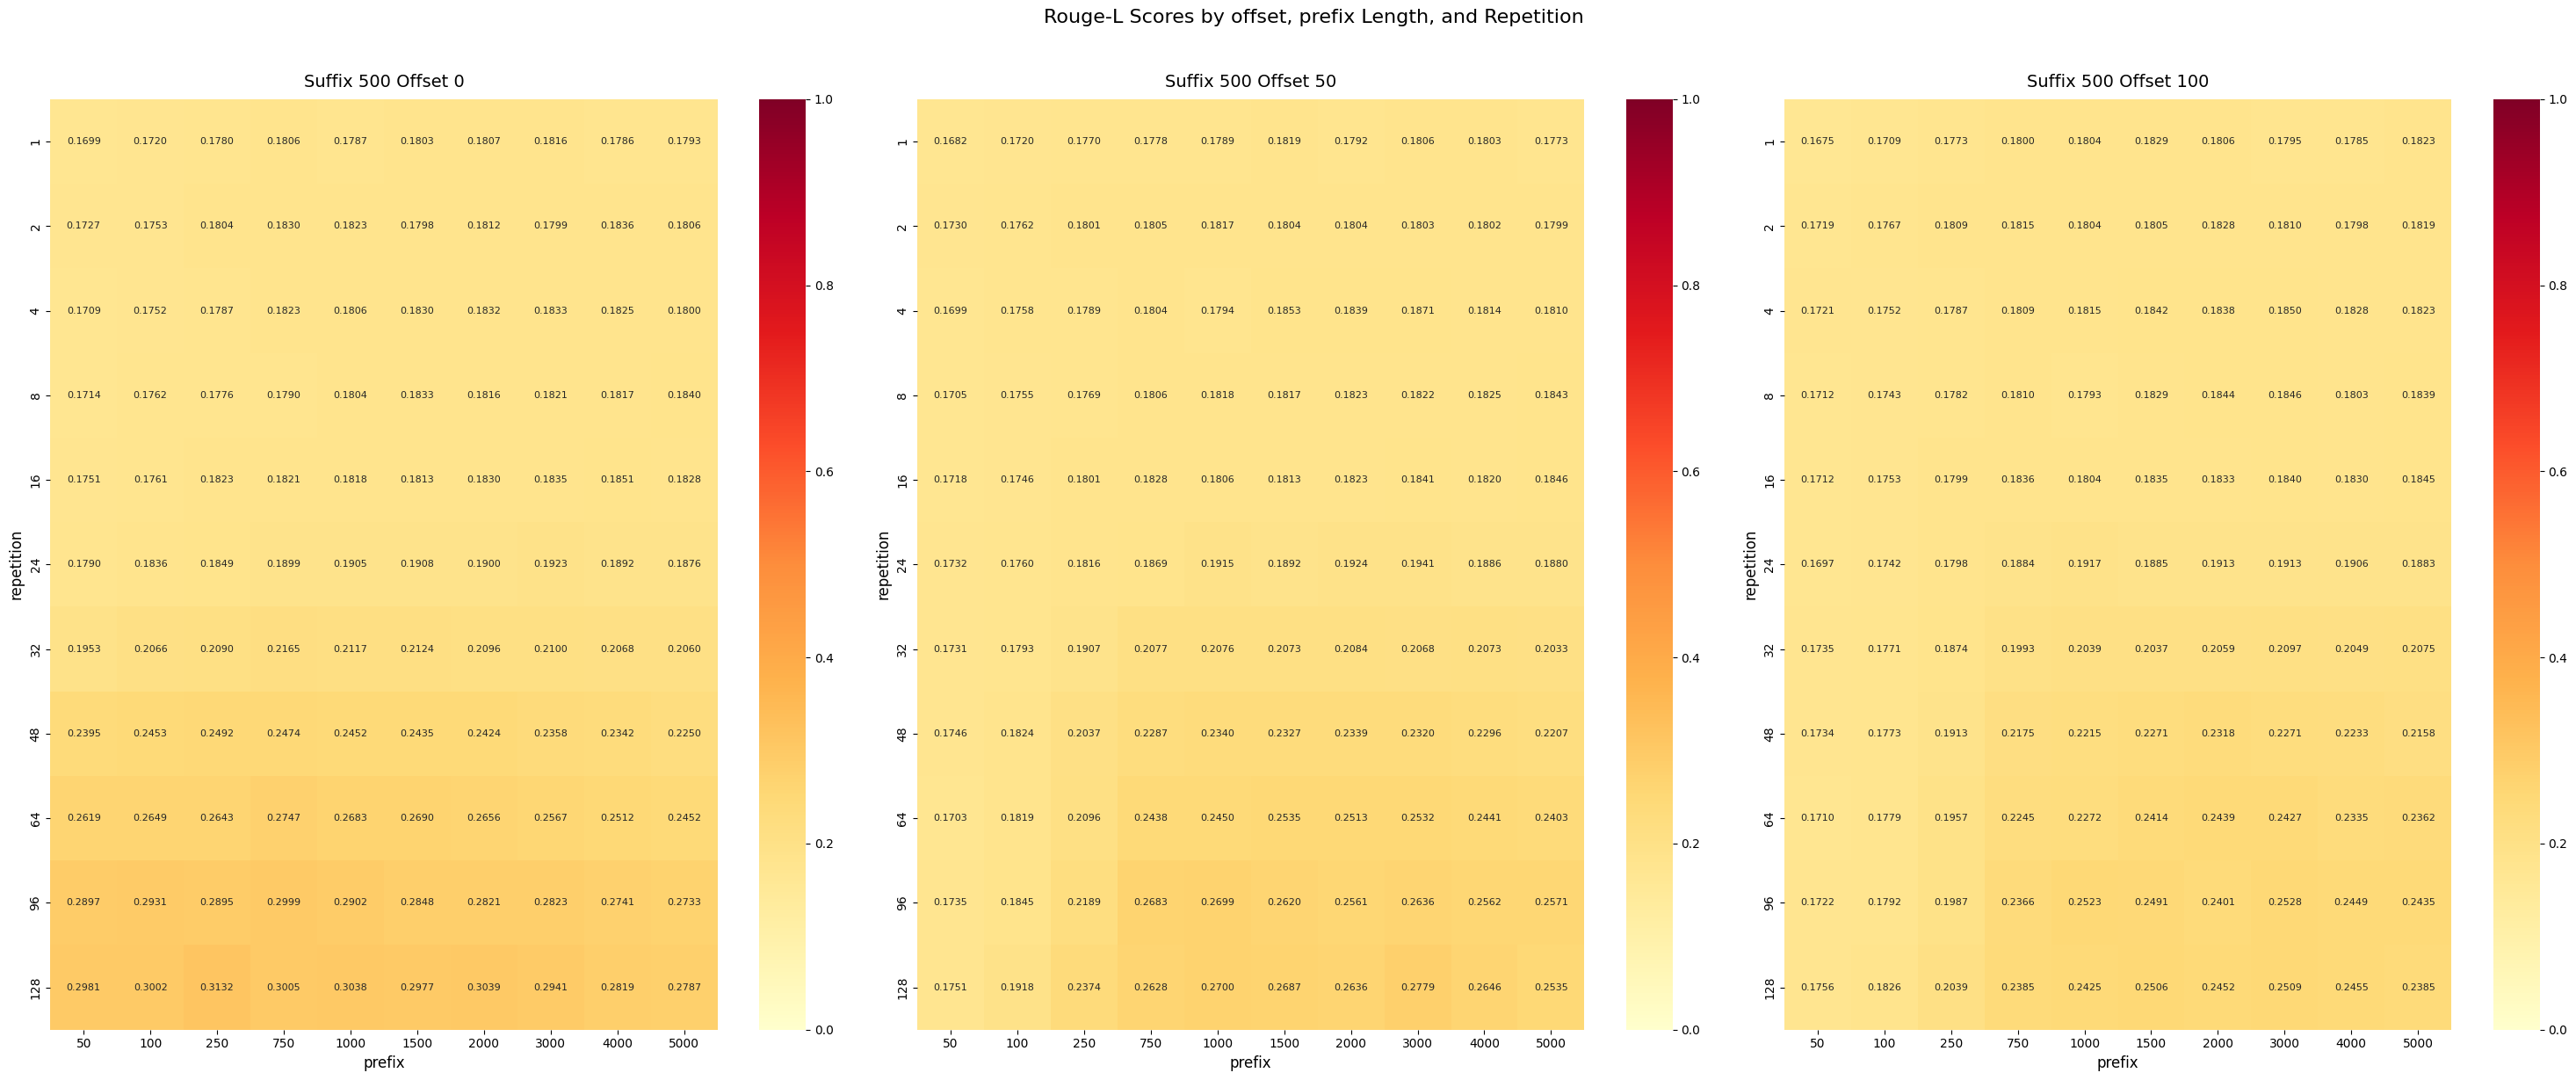

In [11]:
offsets = [0, 50, 100]

heatmap_data = {
    f'Suffix 500 Offset {offset}': get_repetition_mean_df(
        results=result,
        metric='Rouge-L',
        suffix=500,
        offset=offset
    ) for offset in offsets
}

create_heatmaps_subplots(heatmap_data)

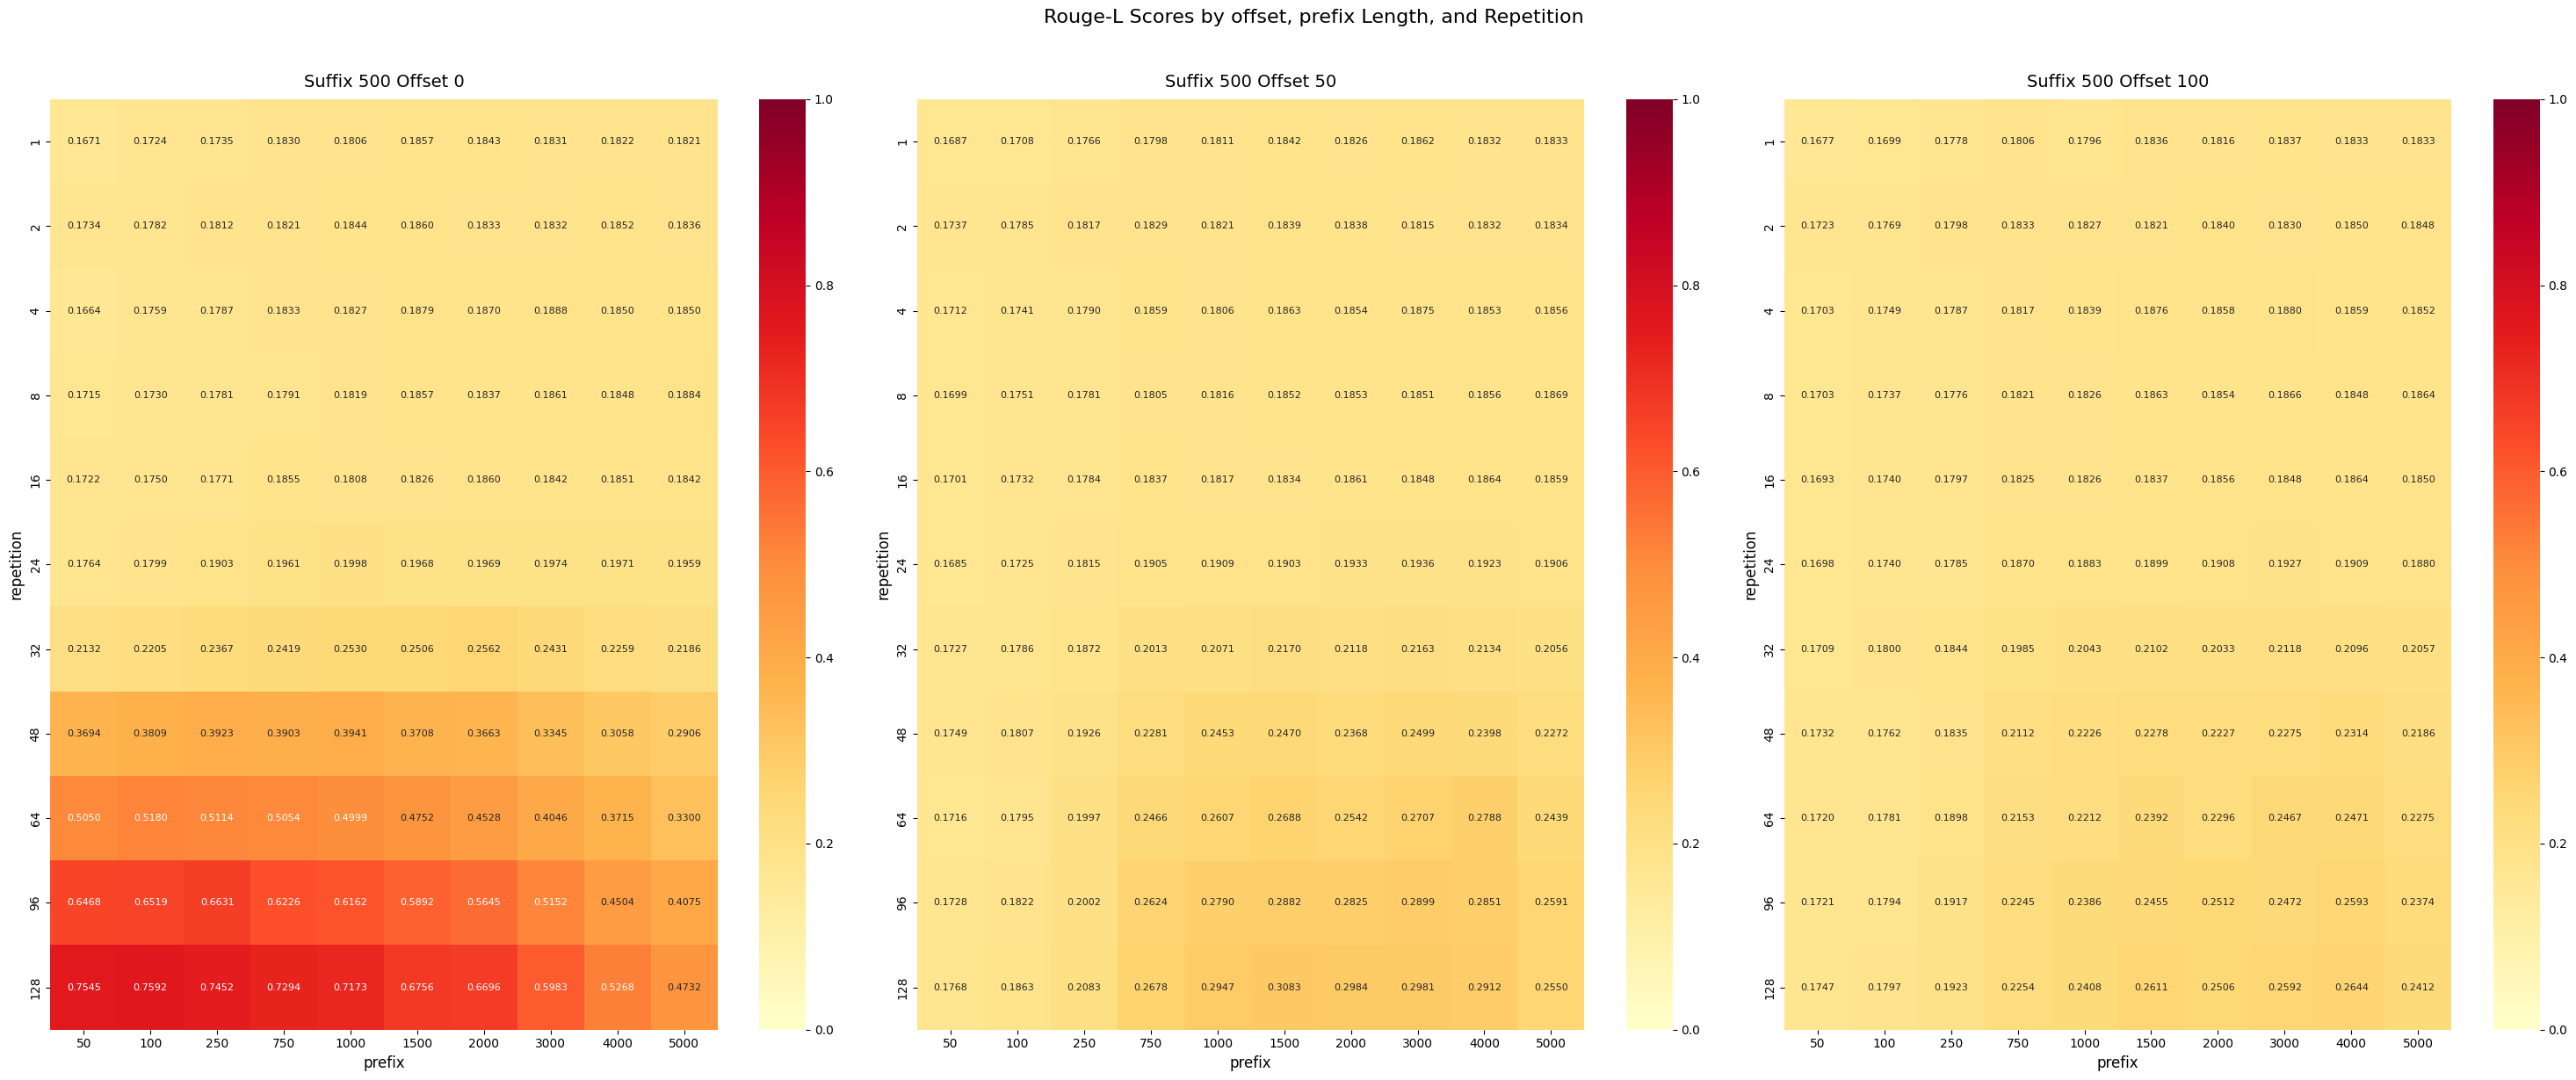

In [11]:
offsets = [0, 50, 100]

heatmap_data = {
    f'Suffix 500 Offset {offset}': get_repetition_mean_df(
        results=Results.load('/capstor/users/cscs/xyixuan/PDM/results/sparse/llama3-1b-15n-8192sl-60gbsz-standard-no-bos/offset_0_50_100_prefix_50_100_250_750_1000_1500_2000_3000_4000_5000_suffix_500.pkl'),
        metric='Rouge-L',
        suffix=500,
        offset=offset
    ) for offset in offsets
}

create_heatmaps_subplots(heatmap_data)

In [16]:
from src.vis.heatmaps import create_heatmaps_subplots, create_heatmaps_difference_subplots


In [30]:

heatmap_data_xdoc = {
    f'Suffix 500 Offset {offset}': get_repetition_mean_df(
        results=Results.load('/capstor/users/cscs/xyixuan/PDM/results/sparse/llama3-1b-15n-8192sl-60gbsz-goldfish-bod-hiding-xboc/offset_0_50_100_prefix_50_100_250_750_1000_1500_2000_3000_4000_5000_suffix_500.pkl'),
        metric='Rouge-L',
        suffix=500,
        offset=offset
    ) for offset in offsets
}

In [31]:

heatmap_data = {
    f'Suffix 500 Offset {offset}': get_repetition_mean_df(
        results=Results.load('/capstor/users/cscs/xyixuan/PDM/results/sparse/llama3-1b-15n-8192sl-60gbsz-goldfish-no-bos/offset_0_50_100_prefix_50_100_250_750_1000_1500_2000_3000_4000_5000_suffix_500.pkl'),
        metric='Rouge-L',
        suffix=500,
        offset=offset
    ) for offset in offsets
}

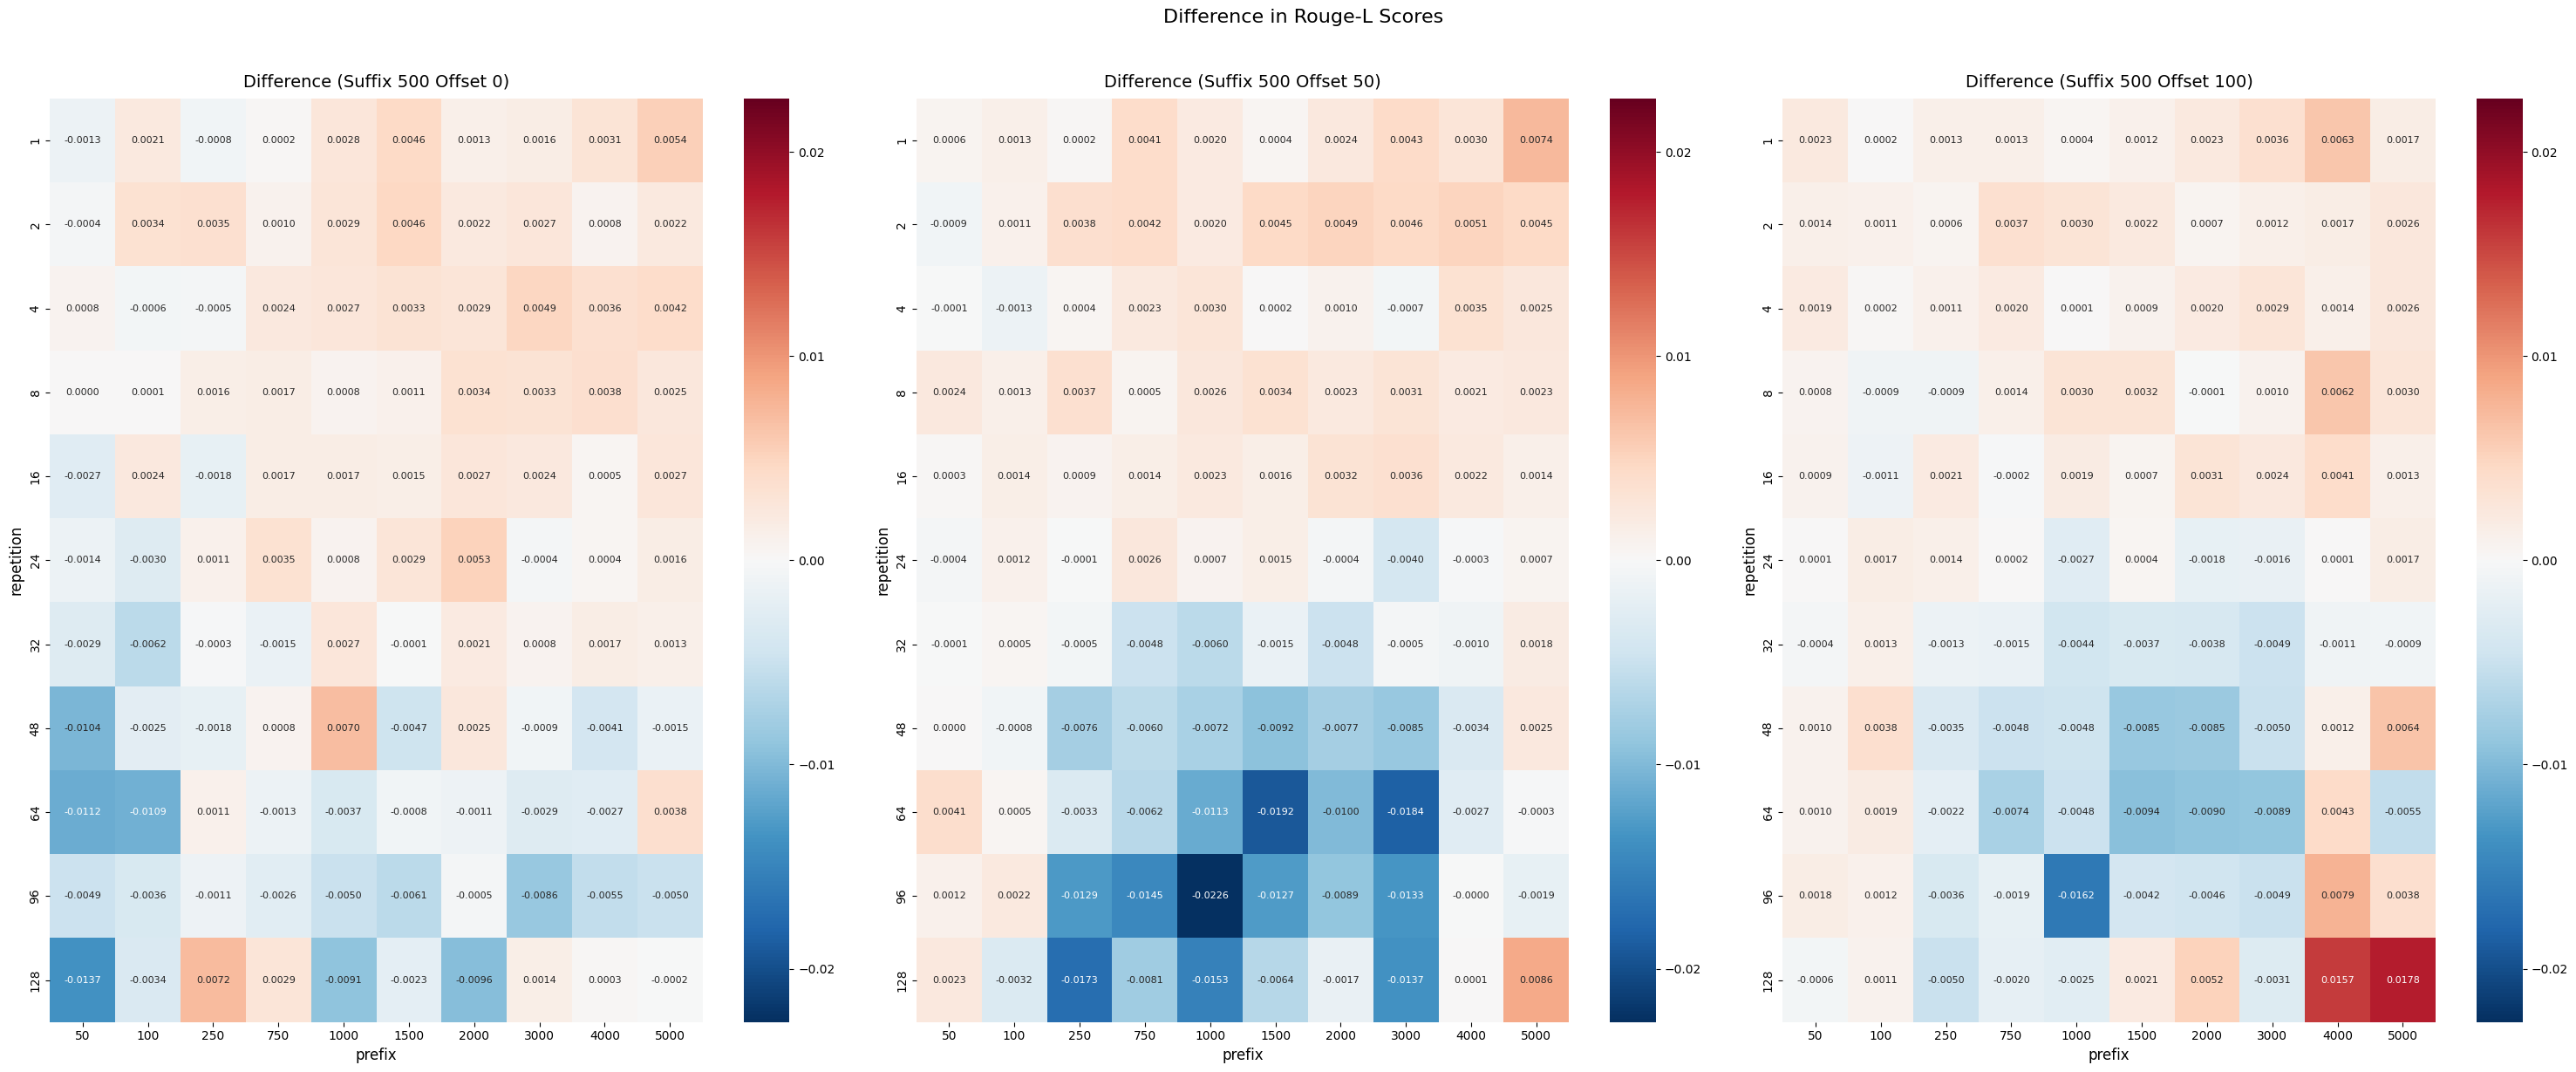

In [32]:
create_heatmaps_difference_subplots(heatmap_data_xdoc, heatmap_data)